## Building the graph

In [1]:
import networkx as nx
import numpy as np
import pandas as pd

In [2]:
import os
from path import Path
PROJ_DIR = Path().getcwd().parent
DATA_DIR = PROJ_DIR / "data"
os.chdir (PROJ_DIR)

In [3]:
from scripts.src.BuilderGraph import BuilderGraph
from scripts.src.BuilderGraphWithMerge import BuilderGraphWithMerge

In [4]:
import json

with open(DATA_DIR/'dpc-covid19-ita-province.json') as f:
         d= json.load(f) 
json.dumps(d)
covid19_dataset=pd.DataFrame(d)
covid19_dataset.head()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en
0,2020-02-24T18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,,
1,2020-02-24T18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,,
2,2020-02-24T18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0,,
3,2020-02-24T18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0,,
4,2020-02-24T18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,,0.000000,0.000000,0,,


In [5]:
covid19_dataset.columns

Index(['data', 'stato', 'codice_regione', 'denominazione_regione',
       'codice_provincia', 'denominazione_provincia', 'sigla_provincia', 'lat',
       'long', 'totale_casi', 'note_it', 'note_en'],
      dtype='object')

In [6]:
covid19_dataset.drop_duplicates(subset=['denominazione_provincia'],inplace=True)


In [7]:
covid19_dataset.head(20)

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en
0,2020-02-24T18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,,
1,2020-02-24T18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,,
2,2020-02-24T18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0,,
3,2020-02-24T18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0,,
4,2020-02-24T18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,,0.000000,0.000000,0,,
5,2020-02-24T18:00:00,ITA,17,Basilicata,77,Matera,MT,40.667512,16.597924,0,,
6,2020-02-24T18:00:00,ITA,17,Basilicata,76,Potenza,PZ,40.639471,15.805148,0,,
8,2020-02-24T18:00:00,ITA,21,P.A. Bolzano,21,Bolzano,BZ,46.499335,11.356624,0,,
10,2020-02-24T18:00:00,ITA,18,Calabria,79,Catanzaro,CZ,38.905976,16.594402,0,,
11,2020-02-24T18:00:00,ITA,18,Calabria,78,Cosenza,CS,39.293087,16.256097,0,,


In [8]:
provincia = covid19_dataset['denominazione_provincia']
lat = covid19_dataset['lat']
long = covid19_dataset['long']
province = pd.DataFrame(data = {'citta': provincia, 'lat': lat, 'long':long})
province.head()

,citta,lat,long
0,Chieti,42.351032,14.167546
1,L'Aquila,42.351222,13.398438
2,Pescara,42.464584,14.213648
3,Teramo,42.658918,13.704400
4,In fase di definizione/aggiornamento,0.000000,0.000000


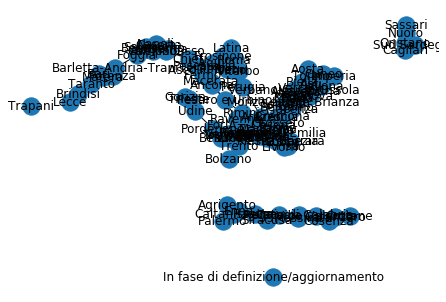

In [9]:
builderGraph1 = BuilderGraph(0.8)
graph = builderGraph1.buildGraph(province)

nx.draw(graph,with_labels=True)

In [10]:
builderGraph2=BuilderGraphWithMerge(0.8)
graph1=builderGraph2.buildGraph(province)
nx.is_isomorphic(graph, graph1)

True

In [11]:
%timeit builderGraph1.buildGraph(province)


14 ms ± 674 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [12]:
%timeit builderGraph2.buildGraph(province)


452 ms ± 9.98 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
